Tasks:

- Convert from multicalss to binary classification target
- Introduce outliers
- Create an imbalance of classes in target
- Introduce null values
- Introduce negative values
- Rename "train_mobil_data" file to "mobile_data"



In [370]:
# Import pandas
import pandas as pd
import sklearn 

# Load 'train' dataset
df_train=pd.read_csv('./train_mobil_data.csv')

# Load 'test' dataset
df_test=pd.read_csv('./test_mobile_data.csv')



In [371]:
# Inspect data
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [372]:
# Inspect data
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [373]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [374]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [375]:
df_test.shape

(1000, 21)

In [376]:
df_train.shape

(2000, 21)

In [377]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


---
# Shuffling the Data 
- Changing the data order
---

In [378]:
df_train = sklearn.utils.shuffle(df_train)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1099,1697,0,0.5,0,0,1,60,0.1,90,4,...,88,1046,441,15,1,11,1,1,0,0
513,1417,1,0.5,0,10,1,45,0.9,166,4,...,364,1029,2129,13,9,12,1,0,1,1
1514,834,0,0.5,0,2,1,27,0.2,123,1,...,1421,1463,1591,11,9,20,1,1,0,1
490,685,0,2.7,0,7,0,17,0.3,174,6,...,725,870,1223,8,0,18,1,0,1,0
1984,797,0,2.2,1,0,0,37,0.9,144,7,...,206,1167,2216,9,5,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,502,0,1.5,1,7,0,37,0.2,199,2,...,705,1810,1649,6,1,14,0,1,0,1
968,1923,0,0.5,1,7,0,46,0.5,191,1,...,767,1759,1489,10,9,3,1,1,1,1
1338,1848,0,1.3,1,7,0,12,0.1,178,2,...,195,533,3915,9,7,8,0,0,1,3
1650,1948,0,2.9,1,4,0,5,0.2,136,1,...,651,700,361,6,1,10,0,1,0,0




------------------
## NOTE:  ***Test dataset does NOT have a price_range column, should not be combined to the training***
-------------------

# Reducing the Number of Classes from 4 to 2
- We are going to make the project a binary classification problem because students were not introduced to multiclass classification

In [379]:
# looking at the class count on the target variable of our data
df_train.value_counts('price_range')

price_range
0    500
1    500
2    500
3    500
dtype: int64

In [380]:
# Modify target from multiple classes to only 2 classes
df_train.loc[((df_train.price_range == 0) | (df_train.price_range == 1)), "price_range"] = 0
df_train.loc[((df_train.price_range == 2) | (df_train.price_range == 3)), "price_range"] = 1

In [381]:
df_train.value_counts('price_range')

price_range
0    1000
1    1000
dtype: int64

---

# Introducing Ouliers (weight, internal merory, talk time)

- Introducing outliers to the data, to test the students on the data preparation section of the project

---

In [382]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,0.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,0.500125
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,0.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [383]:
df_train.value_counts('mobile_wt').sort_values()

mobile_wt
140     9
120     9
149     9
96      9
116    10
       ..
146    26
199    26
185    27
101    27
182    28
Length: 121, dtype: int64

<AxesSubplot:xlabel='talk_time'>

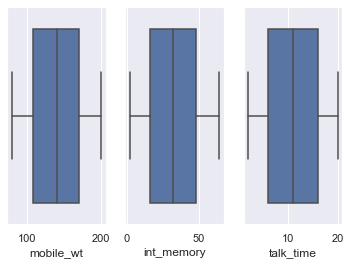

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x='mobile_wt',data=df_train,ax=axs[0])
sns.boxplot(x='int_memory',data=df_train, ax=axs[1])
sns.boxplot(x='talk_time',data=df_train, ax=axs[2])

In [385]:
mobile_wt_200 = df_train[df_train['mobile_wt']>=188]
mobile_wt_200

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
182,1082,0,0.8,0,0,0,38,0.1,198,8,...,986,1191,2337,6,1,17,0,1,1,1
331,1867,0,2.3,0,0,1,9,0.1,191,6,...,712,1442,990,6,1,2,1,0,1,0
1529,1831,1,2.2,1,4,0,55,1.0,189,8,...,1693,1790,1133,14,3,10,0,1,0,0
742,1822,0,1.2,0,0,0,8,0.2,195,6,...,172,910,2577,9,5,8,1,1,0,1
1154,987,0,2.0,1,1,0,20,0.8,192,7,...,412,565,1454,11,3,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,808,0,0.5,1,0,0,8,0.1,192,4,...,618,1891,3762,15,9,12,1,0,1,1
111,617,1,2.3,0,0,0,32,0.5,199,7,...,768,874,2213,18,13,7,0,0,0,0
1027,502,0,1.5,1,7,0,37,0.2,199,2,...,705,1810,1649,6,1,14,0,1,0,0
968,1923,0,0.5,1,7,0,46,0.5,191,1,...,767,1759,1489,10,9,3,1,1,1,0


In [386]:
df_train.loc[((df_train.mobile_wt == 188) & (df_train.battery_power == 819)), "mobile_wt"] = 300

In [387]:
df_train.loc[((df_train.mobile_wt == 194) & (df_train.battery_power == 672)), "mobile_wt"] = 350

In [388]:
df_train.loc[((df_train.mobile_wt == 199) & (df_train.battery_power == 915)), "mobile_wt"] = 450

In [389]:
df_train.loc[((df_train.mobile_wt == 198) & (df_train.battery_power == 674)), "mobile_wt"] = 455

In [390]:
mobile_wt_outlier = df_train[df_train['mobile_wt']>200]
mobile_wt_outlier

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1974,915,1,0.5,1,9,1,33,0.3,450,2,...,503,986,2156,7,3,13,1,1,0,0
1992,674,1,2.9,1,1,0,21,0.2,455,3,...,576,1809,1180,6,3,4,1,1,1,0
1961,672,1,0.6,1,13,0,61,0.1,350,5,...,724,1127,1457,14,10,20,1,0,1,0
75,819,0,0.6,1,8,1,42,0.9,300,6,...,339,1242,1814,5,4,13,1,0,1,0


In [391]:
int_memory_61 = df_train[df_train['int_memory']>=61]
int_memory_61

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
447,1349,0,2.0,1,15,0,62,0.3,114,5,...,592,772,2756,11,3,4,1,0,0,1
1407,1617,0,1.5,0,1,1,63,0.7,111,2,...,274,1079,2754,19,10,8,1,1,1,1
1472,1595,0,1.9,1,1,0,63,0.9,88,1,...,1475,1988,908,18,13,6,0,0,1,0
1916,1176,1,2.1,0,2,1,62,0.5,168,2,...,674,1455,1534,6,2,17,1,0,0,0
57,987,0,1.3,1,0,1,61,0.4,107,3,...,581,820,3963,9,4,20,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,720,1,1.4,1,0,1,61,0.6,96,7,...,1347,1733,2799,5,3,15,1,0,1,1
1187,1300,1,0.5,0,5,0,62,0.1,156,6,...,219,1037,874,15,3,10,1,1,0,0
722,1156,0,0.5,0,6,0,61,0.1,89,7,...,1214,1262,1796,16,6,13,0,1,1,0
1685,1521,1,1.6,0,5,1,62,0.3,143,1,...,678,1630,3555,5,2,19,1,0,0,1


In [392]:
df_train.loc[((df_train.int_memory == 63) & (df_train.battery_power == 799)), "int_memory"] = 160

In [393]:
df_train.loc[((df_train.int_memory == 63) & (df_train.battery_power == 1023)), "int_memory"] = 170

In [394]:
df_train.loc[((df_train.int_memory == 61) & (df_train.battery_power == 672)), "int_memory"] = 180

In [395]:
df_train.loc[((df_train.int_memory == 64) & (df_train.battery_power == 727)), "int_memory"] = 185

In [396]:
int_memory_outlier = df_train[df_train['int_memory']>70]
int_memory_outlier


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
61,799,1,2.3,0,1,1,160,0.8,144,8,...,361,975,431,15,6,6,1,1,1,0
1927,1023,1,0.7,0,2,1,170,0.7,153,7,...,367,1985,3155,11,10,7,1,1,1,1
1953,727,1,2.5,1,0,1,185,0.2,193,1,...,664,711,3654,9,1,16,1,1,0,1
1961,672,1,0.6,1,13,0,180,0.1,350,5,...,724,1127,1457,14,10,20,1,0,1,0


In [397]:
talk_time_20 = df_train[df_train['talk_time']>=19]
talk_time_20.sort_values('talk_time')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1143,904,1,1.2,1,10,1,31,0.8,112,3,...,657,1014,2814,13,3,19,1,0,0,1
1957,1589,0,0.6,0,0,0,5,0.8,112,5,...,776,1397,3430,7,5,19,1,1,1,1
905,989,1,2.0,0,4,0,17,0.2,166,3,...,256,1394,3892,18,7,19,1,1,0,1
693,986,1,1.5,0,1,1,23,0.8,183,8,...,471,800,2385,16,9,19,1,0,0,0
146,1101,0,1.8,0,0,0,31,0.2,148,2,...,387,1269,2196,12,6,19,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,1670,1,3.0,0,14,0,62,0.5,114,8,...,1117,1330,3024,6,0,20,0,0,1,1
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,1
114,1804,0,0.5,0,9,1,22,0.6,153,7,...,1158,1244,3472,9,1,20,1,0,1,1
1451,531,1,0.5,1,0,1,12,0.5,121,4,...,158,1657,2331,18,12,20,1,0,1,0


In [398]:
df_train.loc[((df_train.talk_time == 20) & (df_train.battery_power == 553)), "talk_time"] = 30

In [399]:
df_train.loc[((df_train.talk_time == 19) & (df_train.battery_power == 1735)), "talk_time"] = 40

In [400]:
df_train.loc[((df_train.talk_time == 20) & (df_train.battery_power == 1394)), "talk_time"] = 45

In [401]:
df_train.loc[((df_train.talk_time == 20) & (df_train.battery_power == 1162)), "talk_time"] = 50

In [402]:
talk_time_outlier = df_train[df_train['talk_time']>20]
talk_time_outlier

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1196,1735,0,1.8,1,16,0,34,0.1,140,2,...,149,876,2392,17,15,40,1,0,1,1
295,1162,0,2.0,0,0,1,56,0.7,114,7,...,56,997,1652,5,0,50,1,0,0,0
1173,553,1,2.2,1,0,1,18,0.7,136,2,...,1287,1892,3300,12,10,30,1,0,0,1
358,1394,1,0.9,1,10,1,62,0.3,175,5,...,1010,1565,473,11,1,45,1,1,0,0


<AxesSubplot:xlabel='talk_time'>

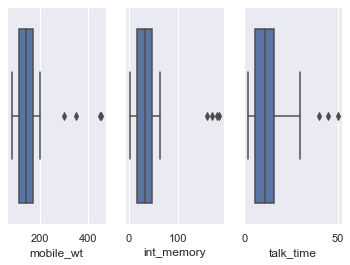

In [403]:
# import seaborn
import seaborn as sns


fig, axs = plt.subplots(ncols=3)
sns.boxplot(x='mobile_wt',data=df_train,ax=axs[0])
sns.boxplot(x='int_memory',data=df_train, ax=axs[1])
sns.boxplot(x='talk_time',data=df_train, ax=axs[2])

In [404]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1099,1697,0,0.5,0,0,1,60,0.1,90,4,...,88,1046,441,15,1,11,1,1,0,0
513,1417,1,0.5,0,10,1,45,0.9,166,4,...,364,1029,2129,13,9,12,1,0,1,0
1514,834,0,0.5,0,2,1,27,0.2,123,1,...,1421,1463,1591,11,9,20,1,1,0,0
490,685,0,2.7,0,7,0,17,0.3,174,6,...,725,870,1223,8,0,18,1,0,1,0
1984,797,0,2.2,1,0,0,37,0.9,144,7,...,206,1167,2216,9,5,6,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,502,0,1.5,1,7,0,37,0.2,199,2,...,705,1810,1649,6,1,14,0,1,0,0
968,1923,0,0.5,1,7,0,46,0.5,191,1,...,767,1759,1489,10,9,3,1,1,1,0
1338,1848,0,1.3,1,7,0,12,0.1,178,2,...,195,533,3915,9,7,8,0,0,1,1
1650,1948,0,2.9,1,4,0,5,0.2,136,1,...,651,700,361,6,1,10,0,1,0,0


---
# Introducing Null Values (clock speed,  pixel width, ram)
- Introducing outliers to the data, to test the students on the data preparation section of the project
---


In [406]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [407]:
# select only numeric columns to apply the missingness to
cols_list = ['clock_speed', 'px_width', 'ram' ]
        
# randomly remove cases from the dataframe
for col in df_train[cols_list]:
    df_train.loc[df_train.sample(frac=0.10).index, col] = np.nan

In [408]:
df_train.isnull().sum()

battery_power      0
blue               0
clock_speed      200
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width         200
ram              200
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [410]:
#df_train.to_csv(r'./mobile_data_raw.csv', index = False)

In [415]:
df_train.loc[df_train.sample(frac=0.10).index, 'price_range'] = 1

In [417]:
df_train.value_counts('price_range')

price_range
1    1108
0     892
dtype: int64

In [418]:
df_train.to_csv(r'./mobile_data_raw.csv', index = False)